### **Insurance Cost Prediction Using Machine Learning**

#### **Problem Statement**

* Medical insurance costs vary significantly based on factors like age, BMI, smoking habits, and region.
* Insurance providers and individuals often lack a transparent way to estimate annual insurance charges based on these attributes.
* This project aims to predict medical insurance costs using machine learning to improve cost estimation and decision-making

#### **Objective**

* To build a machine learning model that predicts insurance charges based on user attributes
* To analyze key factors affecting insurance cost
* To deploy the trained model logic into an interactive web interface for real-time prediction

### Data Exploration And Cleaing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
insurance_df=pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.shape

(1338, 7)

In [5]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
insurance_df=insurance_df.drop_duplicates()

In [8]:
insurance_df.duplicated().sum()

np.int64(0)

### EDA

In [9]:
insurance_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


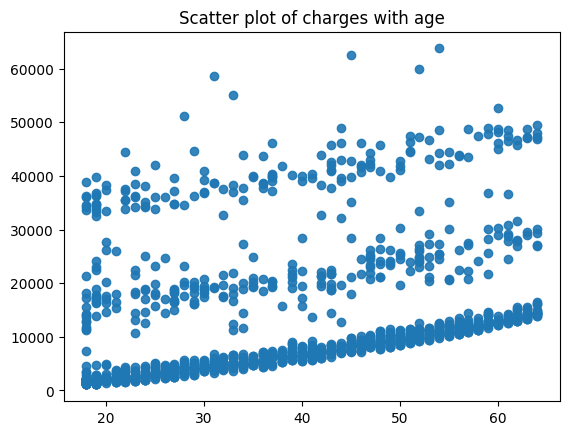

In [10]:
plt.scatter(insurance_df['age'], insurance_df['charges'], alpha=0.9)
plt.title('Scatter plot of charges with age')
plt.show()

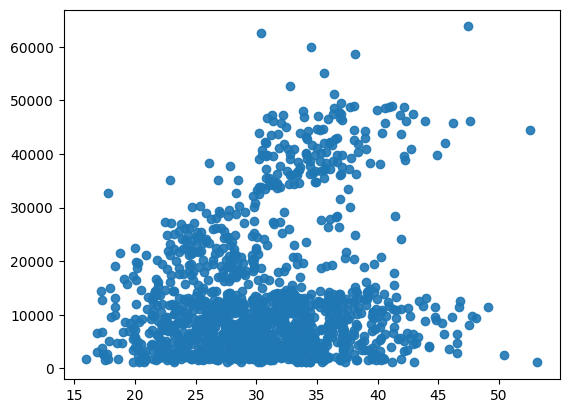

In [11]:
plt.scatter(insurance_df['bmi'],insurance_df['charges'],alpha=0.9)

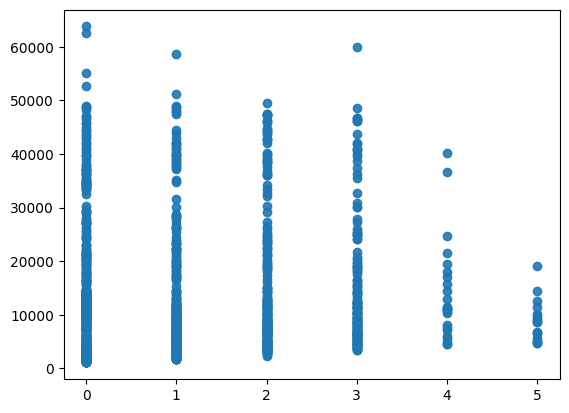

In [12]:
plt.scatter(insurance_df['children'],insurance_df['charges'],alpha=0.9)

In [13]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
a=insurance_df.groupby(['region'])['charges'].sum().reset_index()
a

,region,charges
0,northeast,4.343669e+06
1,northwest,4.034072e+06
2,southeast,5.363690e+06
3,southwest,4.012755e+06


<Axes: xlabel='region', ylabel='charges'>

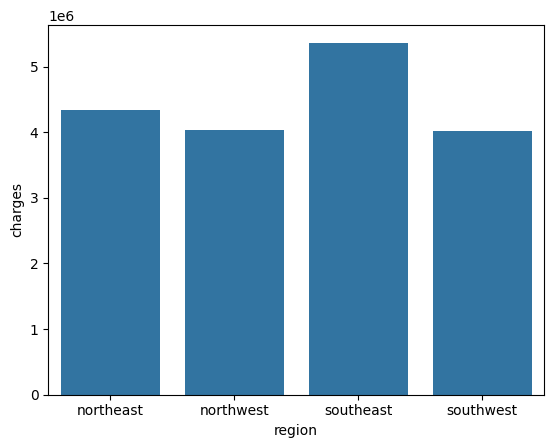

In [15]:
sns.barplot(data=a,x='region',y='charges')

##### Data preprocessing

In [16]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [18]:
le=LabelEncoder()
insurance_df['sex']=le.fit_transform(insurance_df['sex'])

In [19]:
insurance_df['smoker']=le.fit_transform(insurance_df['smoker'])

In [20]:
# onehotencoding
from sklearn.preprocessing import OneHotEncoder
a=pd.get_dummies(insurance_df['region'],drop_first=True).replace({True:0,False:0})
insurance_df=pd.concat([insurance_df,a],axis=1).drop(columns=['region'])

C:\Users\P\AppData\Local\Temp\ipykernel_2668\4227344820.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a=pd.get_dummies(insurance_df['region'],drop_first=True).replace({True:0,False:0})


In [21]:
insurance_df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,0
2,28,1,33.000,3,0,4449.46200,0,0,0
3,33,1,22.705,0,0,21984.47061,0,0,0
4,32,1,28.880,0,0,3866.85520,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,0
1336,21,0,25.800,0,0,2007.94500,0,0,0


In [22]:
insurance_df['bmi_smoker'] = insurance_df['bmi'] * insurance_df['smoker']


In [23]:
target='charges'
# Create a list of independent variables
independent_variables = list(set(insurance_df.columns.tolist()) - {target})
# y = np.log1p(df['charges'])


In [24]:
# scores=[]
# for i in range(1000):
#     X=insurance_df[independent_variables].values
#     y=insurance_df[target].values

#     from sklearn.model_selection import train_test_split
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    
#     from sklearn.preprocessing import MinMaxScaler
#     scalar=MinMaxScaler()

#     X_train=scalar.fit_transform(X_train)
#     X_test=scalar.transform(X_test)

#     from sklearn.linear_model import LinearRegression
#     re=LinearRegression()
#     re.fit(X_train,y_train)

#     y_pred_train = re.predict(X_train)

#     y_pred = re.predict(X_test)

#     from sklearn.metrics import r2_score,mean_squared_error

#     scores.append(r2_score(y_pred, y_test))

    

In [25]:
X=insurance_df[independent_variables].values
y=insurance_df[target].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=868)


In [27]:
# scaling

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
re=LinearRegression()
re.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
re.coef_

array([-6.05279095e+01, -2.20198760e+04,  2.59239823e+03,  1.45519152e-11,
        1.10958354e-10,  7.10347251e+04, -4.72936624e+02,  1.23330601e+04,
        0.00000000e+00])

In [30]:
y_pred_train = re.predict(X_train)

In [31]:
# Predicting the Test set results
y_pred = re.predict(X_test)
y_pred

array([ 5963.98588271, 12438.21865158,  7543.71332869, 11037.84592686,
        4852.08780878,  2534.78890478, 15078.12100861,  4364.71799247,
       13727.66703663,  9453.8994497 ,  8608.9384825 , 12186.09059005,
        7030.29442192,  3007.77553085, 27543.49588148, 52496.50835198,
        7248.31467229,  7901.54964696,  5723.4118655 , 10315.02918802,
       12945.74159833, 26205.57094544, 60831.30498682, 22516.36930004,
        6286.86218715, 13167.84188923, 30131.02535352, 13982.45139747,
        3339.76276829,  4676.16041397, 14271.01238193,  8951.65740743,
       10767.39198442, 13786.24185608, 24126.69884981, 11666.02136361,
       50832.60451331,  8898.52852635, 46892.67242811, 30228.85768276,
        5406.43368287,  5678.50220788,  2467.68034179,  7100.70314356,
       35400.0293486 , 30224.89252195,  4887.63951772, 46792.03462987,
       35695.19970721,  7311.7647261 , 10591.47292334, 13683.12138047,
       37402.38929371, 10485.19180076, 12644.32866887, 47203.15000321,
      

In [32]:
# Actual profits on test data
y_test

array([ 3761.292   , 10807.4863  ,  5630.45785 ,  9193.8385  ,
        3238.4357  ,  1391.5287  , 27941.28758 ,  3206.49135 ,
       13228.84695 ,  7419.4779  ,  6311.952   , 10976.24575 ,
        5354.07465 ,  1880.487   , 23306.547   , 47269.854   ,
        5325.651   ,  5855.9025  ,  4438.2634  ,  8116.68    ,
       11253.421   , 21978.6769  , 63770.42801 , 17043.3414  ,
        3935.1799  , 12096.6512  , 34439.8559  , 13063.883   ,
        2103.08    ,  3268.84665 , 14043.4767  ,  7173.35995 ,
        8551.347   , 12981.3457  , 35147.52848 , 10422.91665 ,
       42112.2356  ,  6474.013   , 44202.6536  , 36189.1017  ,
        3956.07145 ,  4337.7352  ,  2211.13075 ,  5116.5004  ,
       27533.9129  , 32787.45859 ,  3208.787   , 48517.56315 ,
       42303.69215 ,  5253.524   ,  8442.667   , 12105.32    ,
       37484.4493  ,  8219.2039  , 10928.849   , 39722.7462  ,
       12890.05765 , 11013.7119  ,  2710.82855 , 18806.14547 ,
       37165.1638  , 46889.2612  , 23967.38305 , 15820.

In [33]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_pred, y_test)

0.8887031538872526

In [34]:
# Train performance
import math
math.sqrt(mean_squared_error(y_train, y_pred_train))

5008.671971518048

In [35]:
r2_score(y_train, y_pred_train)

0.8205938484077472

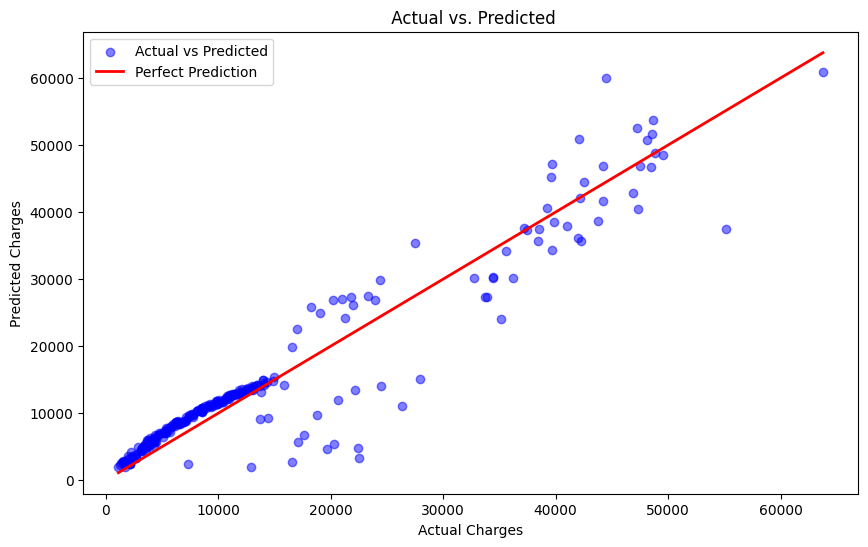

In [36]:


plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')


max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(' Actual vs. Predicted')
plt.legend()
plt.show()

#### **Conclusion**

This project demonstrates how machine learning can be applied to real-world financial and healthcare problems.
It highlights the complete ML pipeline—from data preprocessing and model training to deployment-ready UI—making it suitable for beginner to intermediate ML applications.